ACTION REQUIRED: Please click 'Choose Files' and select your file.


Saving Data-1.csv to Data-1 (4).csv

✅ Successfully loaded file: Data-1 (4).csv

----------------------------------------------------------------
QUESTION 1: Moments about the Origin (Raw Moments).
ANSWER:


,Normal,SK_right,SK_left,Uniform
1th Moment (Raw),65.12,35.48,74.20,12.06
2th Moment (Raw),4248.92,1437.72,5925.40,145.43
3th Moment (Raw),277770.92,68292.44,489458.80,1755.16
4th Moment (Raw),18194173.64,3797594.04,41396161.48,21194.59


----------------------------------------------------------------
QUESTION 2: Moments about the Mean (Central Moments).
ANSWER:


,Normal,SK_right,SK_left,Uniform
1th Moment (Central),-0.00,0.00,-0.00,-0.00
2th Moment (Central),8.31,178.89,419.76,0.08
3th Moment (Central),-0.47,4588.13,-12498.26,0.00
4th Moment (Central),160.95,210642.88,927289.75,0.01


----------------------------------------------------------------
QUESTION 3: Moments about the number 75 for the set of female height measurements. (Inferred Set).
ANSWER:


,SK_left
1th Moment about 75,-0.80
2th Moment about 75,420.40
3th Moment about 75,-13506.20
4th Moment about 75,968896.48


----------------------------------------------------------------
QUESTION 4: Skewness and Kurtosis Coefficients (Standardized Moments).
ANSWER:


,Normal,SK_right,SK_left,Uniform
Skewness Coefficient,-0.02,1.92,-1.45,0.00
Kurtosis (Pearson's),2.33,6.58,5.26,1.56
Kurtosis (Fisher's / Excess),-0.67,3.58,2.26,-1.44


----------------------------------------------------------------


--- VISUALIZATION OUTPUT ---


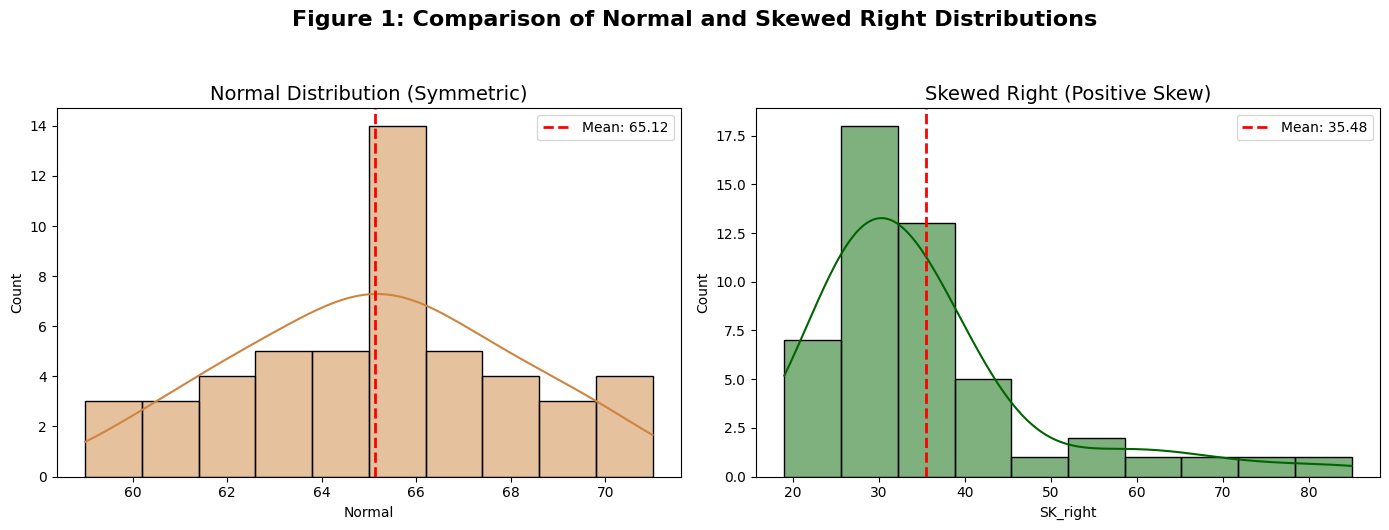

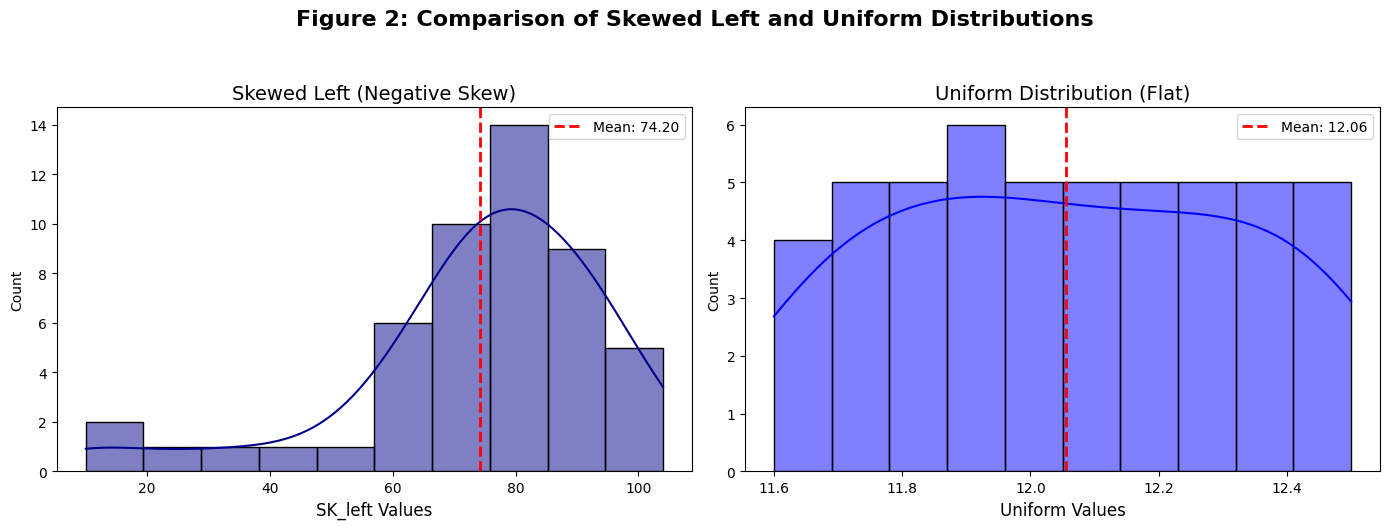

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import io
from IPython.display import display, Markdown


# I. FILE LOADING (ACTION REQUIRED)
print("ACTION REQUIRED: Please click 'Choose Files' and select your file.")
uploaded = files.upload()

try:
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print(f"\n✅ Successfully loaded file: {file_name}\n")
except Exception as e:
    print(f"\n❌ An error occurred during file reading: {e}")
    raise


# II. MOMENT CALCULATION FUNCTIONS

def moment_about_origin(series, n):
    """Calculates the n-th moment about the origin (raw moment)."""
    return (series ** n).mean()

def moment_about_mean(series, n):
    """Calculates the n-th moment about the mean (central moment)."""
    if n == 1:
        return (series - series.mean()).mean() # Should be zero
    return ((series - series.mean()) ** n).mean()

def moment_about_a(series, n, a):
    """Calculates the n-th moment about a specific point 'a'."""
    return ((series - a) ** n).mean()


# III. ANSWERS TO NEW MOMENTS QUESTIONS (1, 2, 3)

# --- Q1: Moments About the Origin (Raw Moments) ---
raw_moments = {
    f'{n}th Moment (Raw)': df.apply(moment_about_origin, n=n) for n in range(1, 5)
}
raw_moments_df = pd.DataFrame(raw_moments).T.round(2)

print("----------------------------------------------------------------")
print("QUESTION 1: Moments about the Origin (Raw Moments).")
print("ANSWER:")
display(raw_moments_df)

# --- Q2: Moments About the Mean (Central Moments) ---
central_moments = {
    f'{n}th Moment (Central)': df.apply(moment_about_mean, n=n) for n in range(1, 5)
}
central_moments_df = pd.DataFrame(central_moments).T.round(2)

print("----------------------------------------------------------------")
print("QUESTION 2: Moments about the Mean (Central Moments).")
print("ANSWER:")
display(central_moments_df)

# --- Q3: Moments About 75 for SK_left ---
# Assuming 'SK_left' is the 'female height measurements' set.
a = 75
moments_about_75 = {
    f'{n}th Moment about 75': moment_about_a(df['SK_left'], n=n, a=a) for n in range(1, 5)
}
moments_75_df = pd.DataFrame(moments_about_75, index=['SK_left']).T.round(2)

print("----------------------------------------------------------------")
print("QUESTION 3: Moments about the number 75 for the set of female height measurements. (Inferred Set).")
print("ANSWER:")
display(moments_75_df)

# IV. ANSWER TO Q4: Skewness and Kurtosis Coefficients
# (Using the calculated central moments)

# Use the calculated central moments (mu_2, mu_3, mu_4) from the central_moments_df
mu2 = central_moments_df.loc['2th Moment (Central)']
mu3 = central_moments_df.loc['3th Moment (Central)']
mu4 = central_moments_df.loc['4th Moment (Central)']

# Calculate Skewness (alpha_3) and Kurtosis (alpha_4)
# Skewness: alpha_3 = mu_3 / (mu_2)^(3/2)
# Kurtosis: alpha_4 = mu_4 / (mu_2)^2 (Pearson's Kurtosis)
skewness_coeff = (mu3 / (mu2 ** 1.5)).round(2)
kurtosis_coeff = (mu4 / (mu2 ** 2)).round(2) # This is Pearson's Kurtosis (raw)

# Fisher's Kurtosis (excess kurtosis): alpha_4 - 3
fisher_kurtosis = (kurtosis_coeff - 3).round(2)

coeffs_df = pd.DataFrame({
    'Skewness Coefficient': skewness_coeff,
    "Kurtosis (Pearson's)": kurtosis_coeff,
    "Kurtosis (Fisher's / Excess)": fisher_kurtosis
}).T

print("----------------------------------------------------------------")
print("QUESTION 4: Skewness and Kurtosis Coefficients (Standardized Moments).")
print("ANSWER:")
display(coeffs_df)
print("----------------------------------------------------------------\n")


# V. VISUALIZATION (Retained from previous steps)

print("\n--- VISUALIZATION OUTPUT ---")

# FIGURE 1: Normal vs. Skewed Right
fig1, axes1 = plt.subplots(1, 2, figsize=(14, 5))
fig1.suptitle('Figure 1: Comparison of Normal and Skewed Right Distributions', fontsize=16, fontweight='bold', y=1.05)
distributions1 = [
    ('Normal', 'Normal Distribution (Symmetric)', 'peru'),
    ('SK_right', 'Skewed Right (Positive Skew)', 'darkgreen')
]

for i, (col, title, color) in enumerate(distributions1):
    sns.histplot(df[col], kde=True, ax=axes1[i], color=color, edgecolor='black', bins=10)
    mean_val = df[col].mean()
    axes1[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes1[i].set_title(title, fontsize=14)
    axes1[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

# FIGURE 2: Skewed Left vs. Uniform
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 5))
fig2.suptitle('Figure 2: Comparison of Skewed Left and Uniform Distributions', fontsize=16, fontweight='bold', y=1.05)
distributions2 = [
    ('SK_left', 'Skewed Left (Negative Skew)', 'darkblue'),
    ('Uniform', 'Uniform Distribution (Flat)', 'b')
]

for i, (col, title, color) in enumerate(distributions2):
    sns.histplot(df[col], kde=True, ax=axes2[i], color=color, edgecolor='black', bins=10)
    mean_val = df[col].mean()
    axes2[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes2[i].set_title(title, fontsize=14)
    axes2[i].set_xlabel(f'{col} Values', fontsize=12)
    axes2[i].legend(loc='upper right')

plt.tight_layout()
plt.show()